In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import tensorflow as tf

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Insurance.csv')

In [ ]:
df.head()

,person_id,age,sex,bmi,children,smoker,region,total_charges
0,1,19.0,female,27.900,0,yes,southwest,16884.9240
1,2,18.0,male,33.770,1,no,southeast,1725.5522
2,3,28.0,male,33.000,3,no,southeast,4449.4620
3,4,33.0,male,22.705,0,no,northwest,21984.4700
4,5,32.0,male,28.880,0,no,northwest,3866.8552


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      1338 non-null   int64  
 1   age            1337 non-null   float64
 2   sex            1338 non-null   object 
 3   bmi            1334 non-null   float64
 4   children       1338 non-null   int64  
 5   smoker         1337 non-null   object 
 6   region         1332 non-null   object 
 7   total_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [ ]:
df.isnull().sum()

,0
person_id,0
age,1
sex,0
bmi,4
children,0
smoker,1
region,6
total_charges,0


In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [ ]:
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])

In [ ]:
df.isnull().sum()

,0
person_id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
total_charges,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
le = LabelEncoder()
ss = StandardScaler()

In [ ]:
df['age'] = ss.fit_transform(df[['age']])
df['sex'] = le.fit_transform(df[['sex']])
df['bmi'] = ss.fit_transform(df[['bmi']])
df['smoker'] = le.fit_transform(df[['smoker']])
df['region'] = le.fit_transform(df[['region']])


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head(10)

,person_id,age,sex,bmi,children,smoker,region,total_charges
0,1,-1.440345,0,-0.453293,0,1,3,16884.9240
1,2,-1.511581,1,0.510782,1,0,2,1725.5522
2,3,-0.799215,1,0.384319,3,0,2,4449.4620
3,4,-0.443031,1,-1.306508,0,0,1,21984.4700
4,5,-0.514268,1,-0.292340,0,0,1,3866.8552
5,6,-0.585505,0,-0.808046,0,0,2,3756.6216
6,7,0.483045,0,0.456584,1,0,2,8240.5900
7,8,-0.158085,0,-0.479571,3,0,1,7281.5054
8,9,-0.158085,1,-0.136314,2,0,0,6406.4106
9,10,1.480359,0,-0.791623,0,0,1,28923.1370


In [ ]:
X = df.drop('total_charges', axis=1)
Y = df['total_charges']


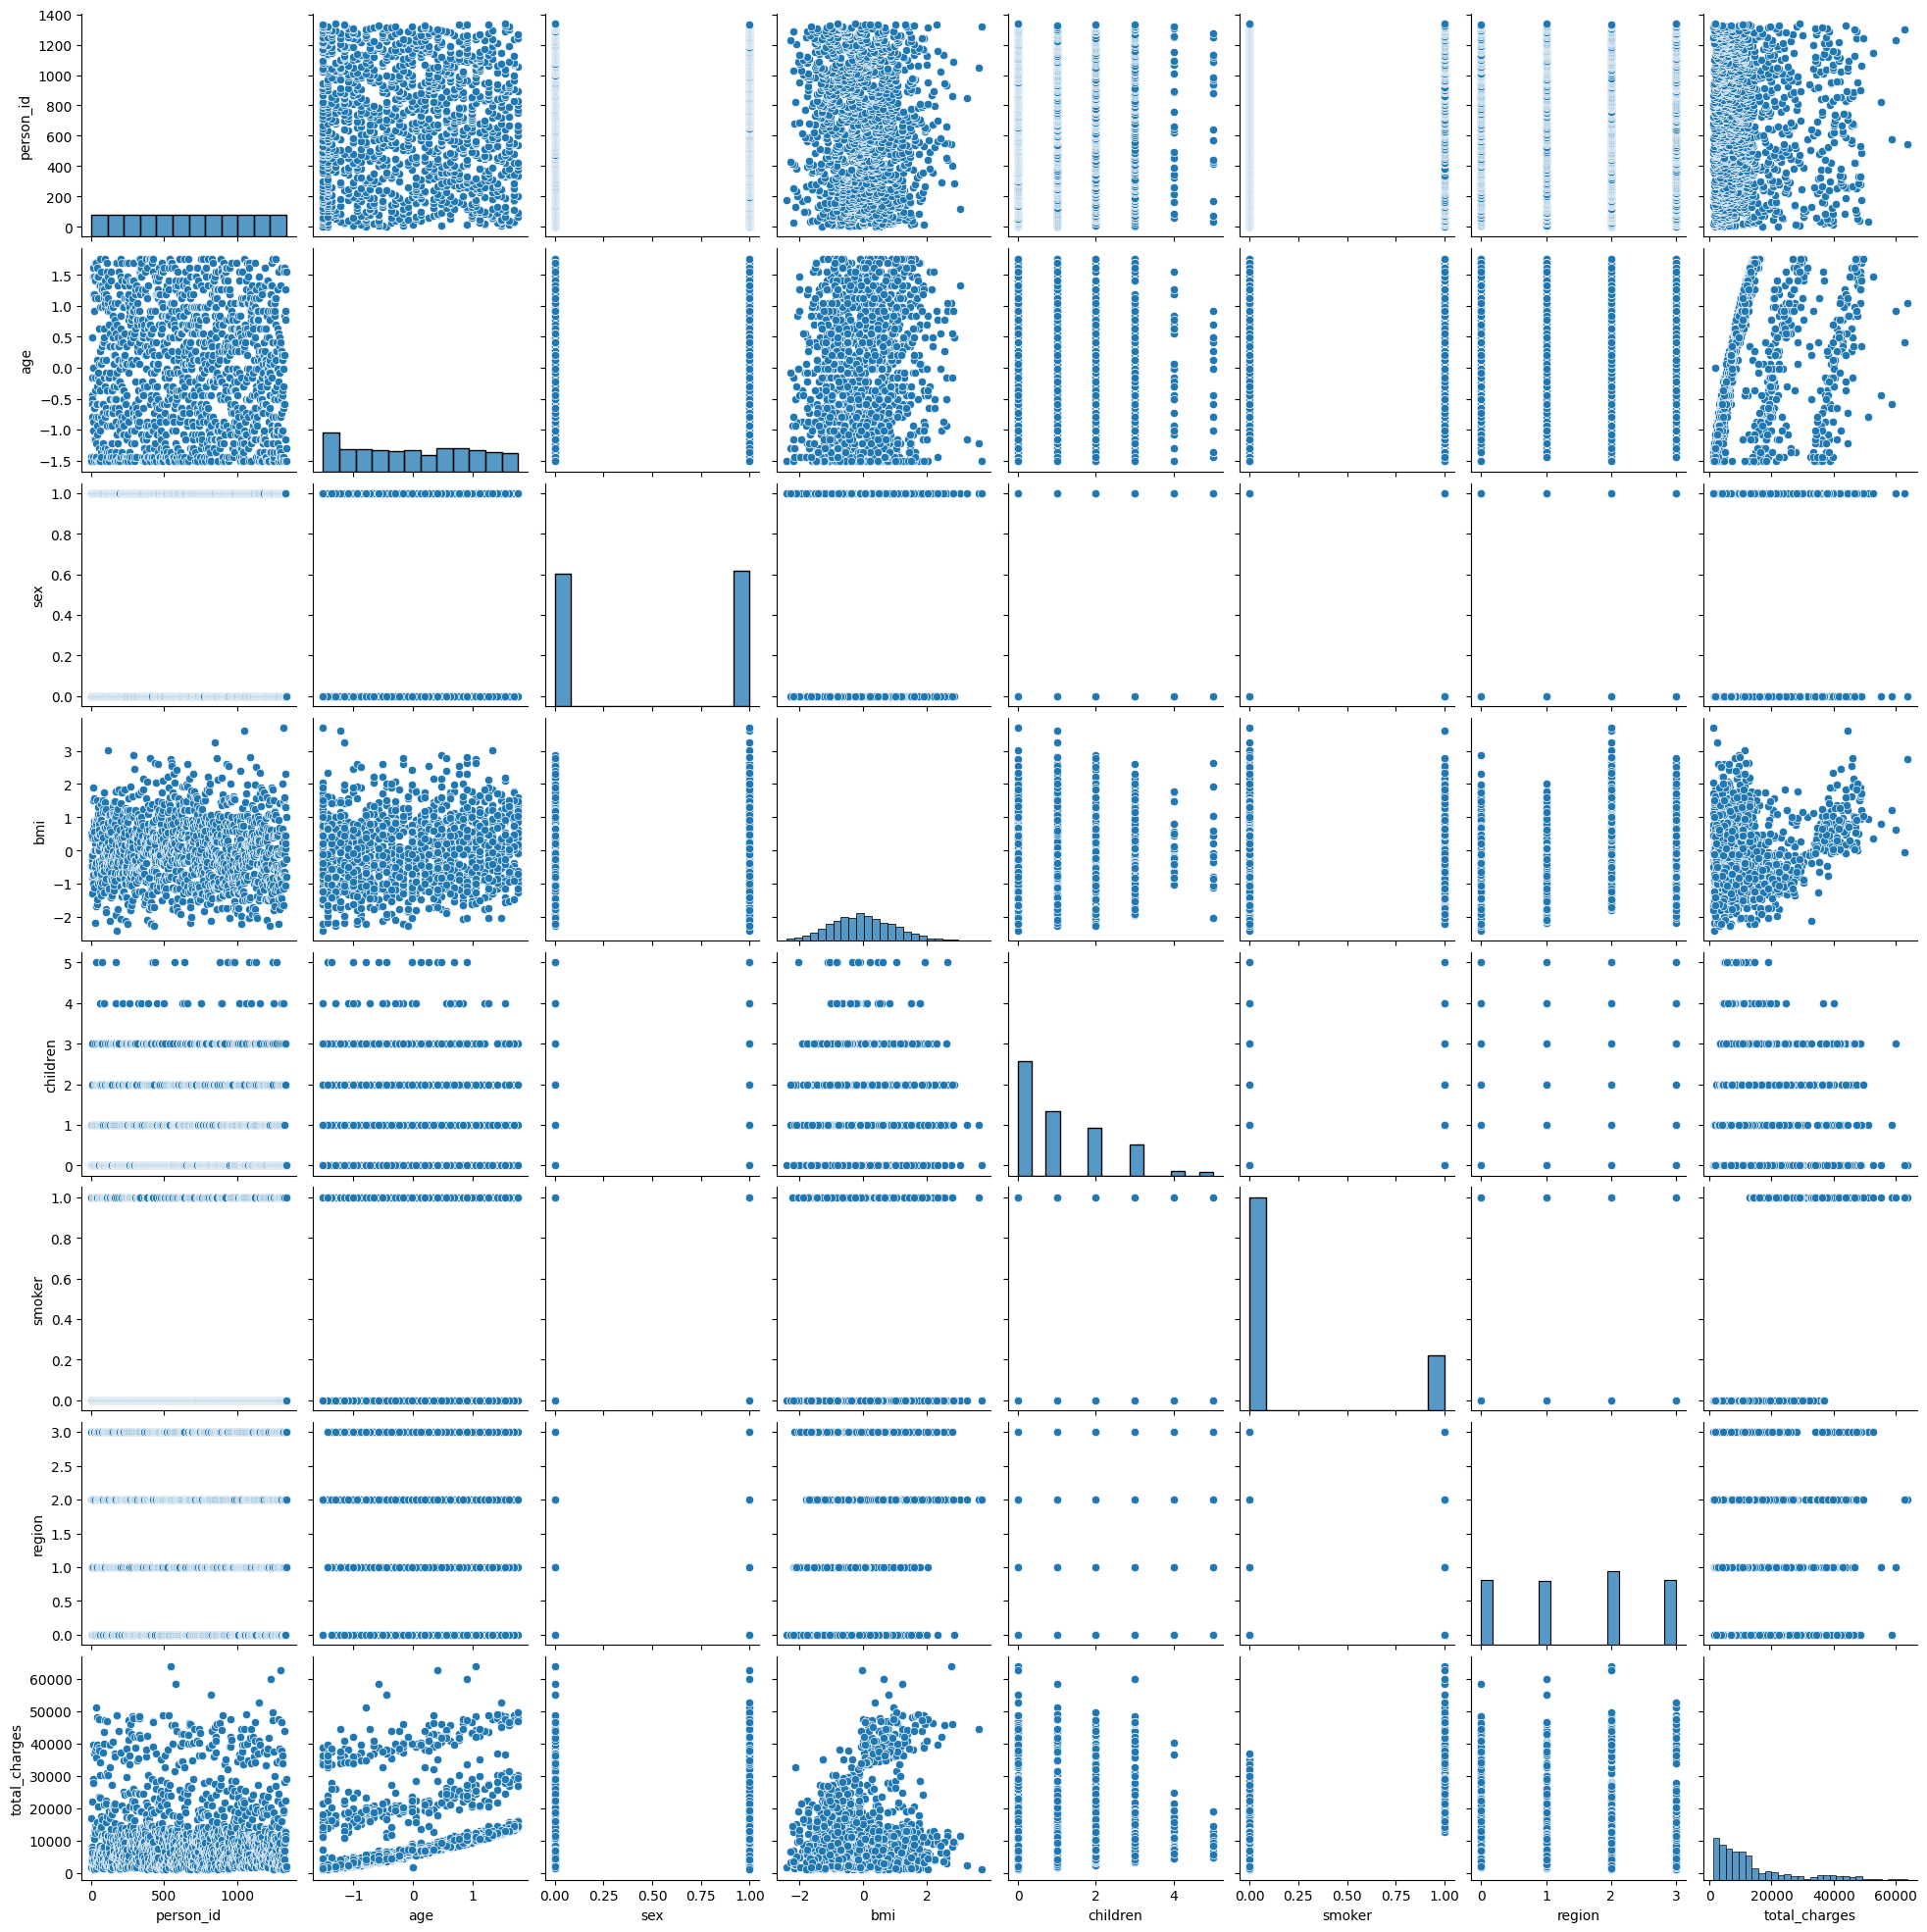

In [ ]:
sns.pairplot(df)

<Axes: >

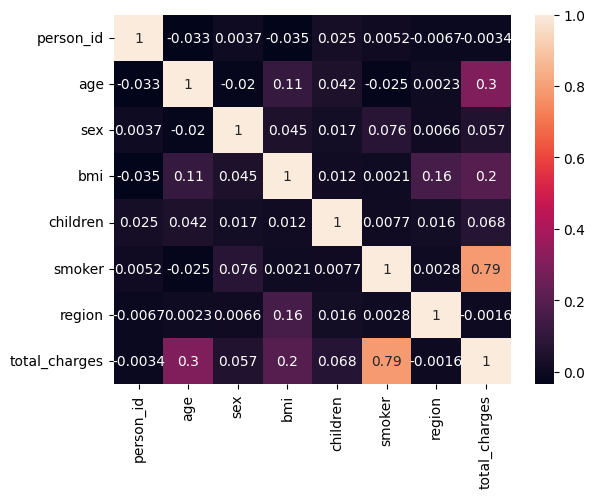

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
Xtrain

,person_id,age,sex,bmi,children,smoker,region
560,561,0.483045,0,-1.758983,2,0,1
1285,1286,0.554282,0,-1.041264,0,0,0
1142,1143,0.910465,0,-0.952576,0,0,2
969,970,-0.015611,0,0.601113,5,0,2
486,487,1.052939,0,-1.509341,3,0,1
...,...,...,...,...,...,...,...
1095,1096,-1.511581,0,0.113327,4,0,0
1130,1131,-0.015611,0,-1.115171,5,0,2
1294,1295,1.337885,1,-0.900841,0,0,0
860,861,-0.158085,0,2.782190,2,1,3


In [ ]:
ytrain

,total_charges
560,9193.8390
1285,8534.6720
1142,27117.9940
969,8596.8280
486,12475.3520
...,...
1095,4561.1885
1130,8582.3030
1294,11931.1250
860,46113.5100


In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluation(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, ypred)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)


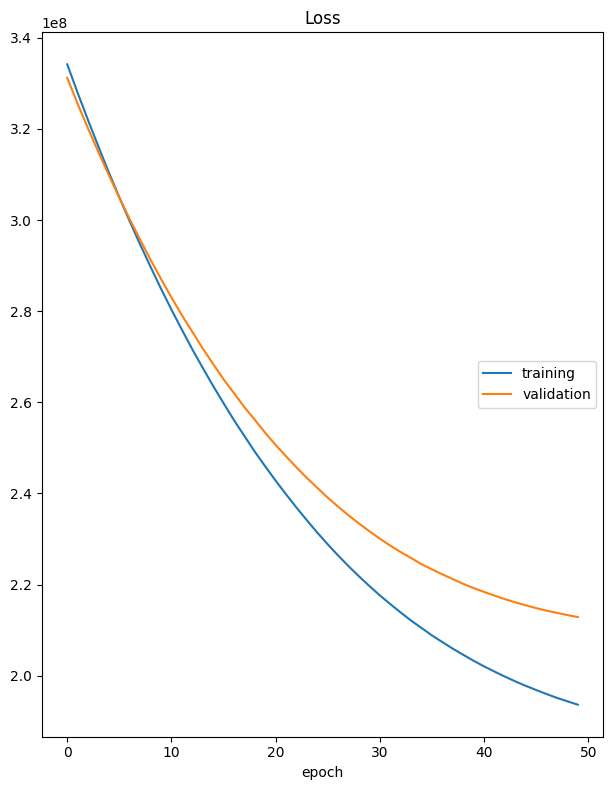

Loss
	training         	 (min: 193643872.000, max: 334154304.000, cur: 193643872.000)
	validation       	 (min: 212876880.000, max: 331181824.000, cur: 212876880.000)
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 185355728.0000 - val_loss: 212876880.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
perceptron = Sequential(
    [
        Dense(1, input_dim=Xtrain.shape[1], activation='linear'),
    ]
)

perceptron.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = 'mean_squared_error',
)

perceptron.fit(Xtrain, ytrain, epochs=50, verbose=1, validation_data=(Xtest, ytest), callbacks=[PlotLossesKerasTF()])

y_pred_p = perceptron.predict(Xtest)

In [ ]:
evaluation(ytest, y_pred_p)

MAE:  9882.988001998854
MSE:  212876898.96675813
RMSE:  14590.30153789695
R2:  -0.37119896532500274


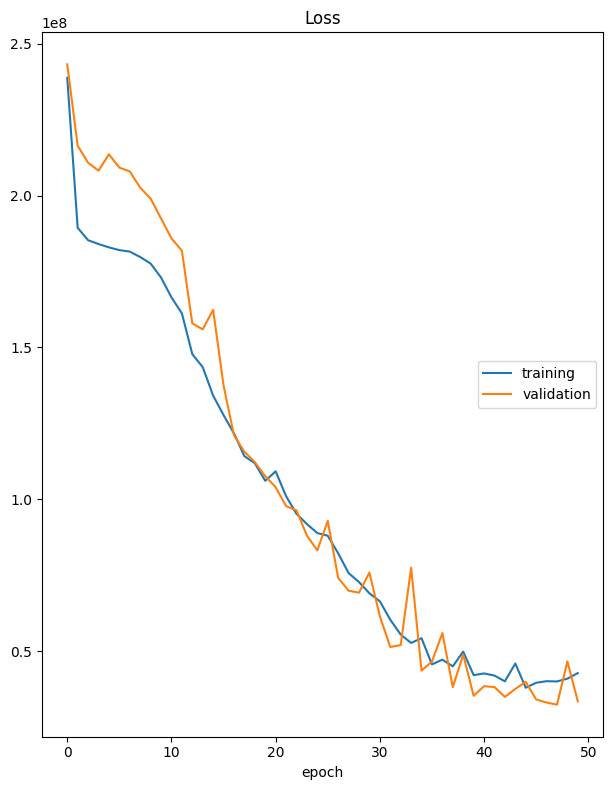

Loss
	training         	 (min: 37912252.000, max: 238797152.000, cur: 42747504.000)
	validation       	 (min: 32330042.000, max: 243233472.000, cur: 33400652.000)
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42199720.0000 - val_loss: 33400652.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
deep = Sequential(
    [
        Dense(64, activation = 'relu', input_dim = Xtrain.shape[1]),
        Dense(32, activation='relu'),
        # Dense(2, input_dim=3, activation='relu'),
        Dense(1)
    ]
)

deep.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = 'mean_squared_error',
)

deep.fit(Xtrain, ytrain, epochs=50, verbose=1, validation_data=(Xtest, ytest), callbacks=[PlotLossesKerasTF()])

deep_y_pred_p = deep.predict(Xtest)

In [ ]:
evaluation(ytest, deep_y_pred_p)

MAE:  4378.043508175795
MSE:  33400654.45130997
RMSE:  5779.329930996324
R2:  0.7848571496150649


In [ ]:
perceptron.save('perceptron.h5')
deep.save('deep.h5')
print('Saved successfully')

Saved successfully
